In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Real%20estate%20price%20prediction/Real%20estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df = df.drop(['No','X5 latitude','X6 longitude'],axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [4]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [5]:
df = df.rename(columns = {"X1 transaction date":"transaction_date", 
                         "X2 house age": "house_age",
                         "X3 distance to the nearest MRT station": "distance_MRT_station",
                         "X4 number of convenience stores":"num_conv_stores",
                         "Y house price of unit area":"price_perunit_area" })
df

,transaction_date,house_age,distance_MRT_station,num_conv_stores,price_perunit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


In [6]:
df.dtypes

transaction_date        float64
house_age               float64
distance_MRT_station    float64
num_conv_stores           int64
price_perunit_area      float64
dtype: object

In [7]:
year_mon = df['transaction_date'].apply(lambda x:str(x).split(".")) #typecasting each value to str and splliting
years = [int(year[0]) for year in year_mon] #years
months = [int(year[1]) for year in year_mon] #months code

df['transaction_year'] = years
df['transaction_month'] = months

df['transaction_month'] = df['transaction_month'].apply(lambda x:x*100 if x<10 else x) 
df['transaction_month'] = df['transaction_month'].apply(lambda x:x*10 if x<100 else x)

def quarter_conv(month):
    if month <= 250:
        return "Q1"
    elif month <= 500:
        return "Q2"
    elif month <= 750:
        return "Q3"
    elif month <= 1000:
        return "Q4"
    
df['transaction_qtr'] = df['transaction_month'].apply(quarter_conv) #Applying converter function

qtrs = df['transaction_qtr']

In [8]:
df.head()

,transaction_date,house_age,distance_MRT_station,num_conv_stores,price_perunit_area,transaction_year,transaction_month,transaction_qtr
0,2012.917,32.0,84.87882,10,37.9,2012,917,Q4
1,2012.917,19.5,306.59470,9,42.2,2012,917,Q4
2,2013.583,13.3,561.98450,5,47.3,2013,583,Q3
3,2013.500,13.3,561.98450,5,54.8,2013,500,Q2
4,2012.833,5.0,390.56840,5,43.1,2012,833,Q4


In [9]:
df = df.drop(['transaction_date', "transaction_month"],axis=1)
df.head()

,house_age,distance_MRT_station,num_conv_stores,price_perunit_area,transaction_year,transaction_qtr
0,32.0,84.87882,10,37.9,2012,Q4
1,19.5,306.59470,9,42.2,2012,Q4
2,13.3,561.98450,5,47.3,2013,Q3
3,13.3,561.98450,5,54.8,2013,Q2
4,5.0,390.56840,5,43.1,2012,Q4


In [10]:
df.dtypes

house_age               float64
distance_MRT_station    float64
num_conv_stores           int64
price_perunit_area      float64
transaction_year          int64
transaction_qtr          object
dtype: object

In [11]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,house_age,distance_MRT_station,num_conv_stores,price_perunit_area,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
0,32.0,84.87882,10,37.9,2012,0,0,1
1,19.5,306.59470,9,42.2,2012,0,0,1
2,13.3,561.98450,5,47.3,2013,0,1,0
3,13.3,561.98450,5,54.8,2013,1,0,0
4,5.0,390.56840,5,43.1,2012,0,0,1


<AxesSubplot:>

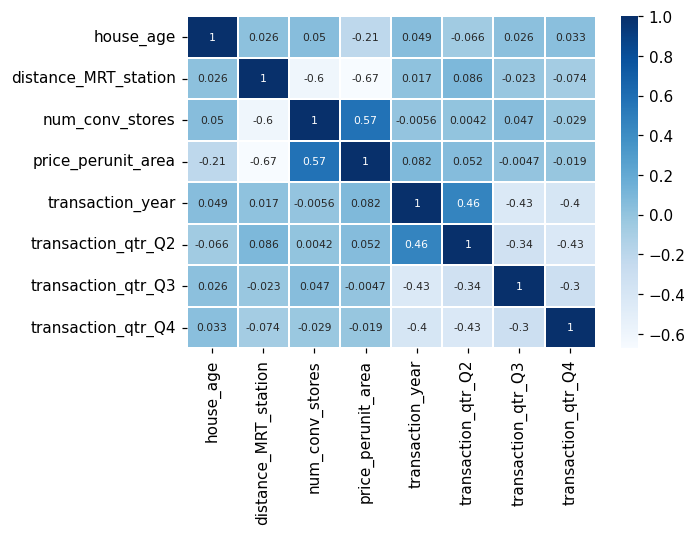

In [12]:
plt.figure(dpi=110)
sns.heatmap(df.corr(), linewidths=1,cmap="Blues",annot=True, annot_kws={'size':7})

In [13]:
abs(df.corr()['price_perunit_area']).sort_values()[::-1][:5]

price_perunit_area      1.000000
distance_MRT_station    0.673613
num_conv_stores         0.571005
house_age               0.210567
transaction_year        0.081545
Name: price_perunit_area, dtype: float64

<AxesSubplot:xlabel='price_perunit_area', ylabel='Count'>

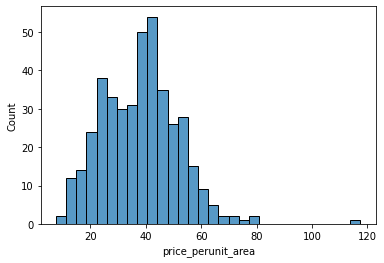

In [14]:
sns.histplot(df['price_perunit_area'],bins=30)

<AxesSubplot:xlabel='distance_MRT_station', ylabel='price_perunit_area'>

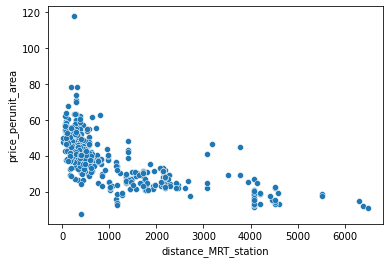

In [15]:
sns.scatterplot(data=df, x='distance_MRT_station',y='price_perunit_area')

<AxesSubplot:xlabel='transaction_year', ylabel='price_perunit_area'>

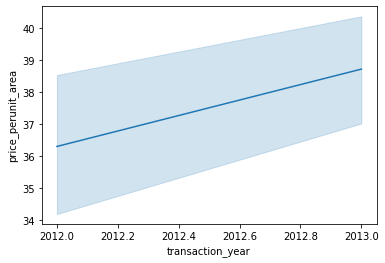

In [16]:
sns.lineplot(x=df['transaction_year'], y=df['price_perunit_area'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transaction_year', ylabel='price_perunit_area'>

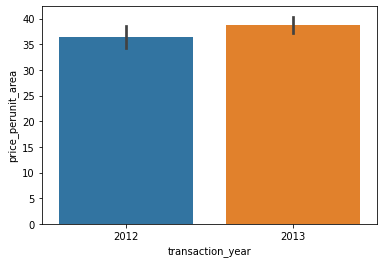

In [17]:
sns.barplot( df['transaction_year'],df['price_perunit_area'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transaction_qtr', ylabel='price_perunit_area'>

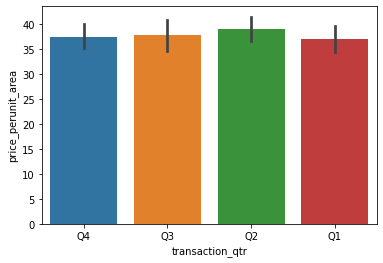

In [18]:
sns.barplot( qtrs,df['price_perunit_area'])

<AxesSubplot:xlabel='house_age', ylabel='price_perunit_area'>

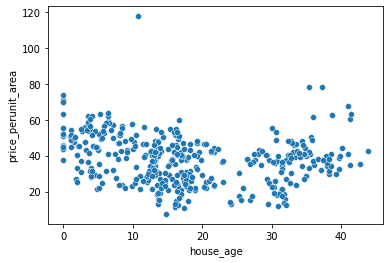

In [19]:
sns.scatterplot(data=df, x='house_age',y='price_perunit_area')

In [20]:
df[(df['price_perunit_area'] >100) & (df['house_age']<20)]

df = df.drop(270)

In [21]:
X = df.drop('price_perunit_area', axis=1)
y = df['price_perunit_area']

In [22]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly_feat = PolynomialFeatures(degree=2)
X_poly = poly_feat.fit_transform(X)
X_poly.shape

(413, 36)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=264)

X_train.shape

(289, 36)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[0] 

array([ 0.        , -0.09359637, -0.59342917,  0.66152517,  0.67793507,
       -0.71078009, -0.50108108, -0.59733367, -0.3580947 , -0.49836103,
        0.29811465, -0.09338138, -0.5561333 , -0.39509094, -0.4780041 ,
       -0.41678985, -0.12053425, -0.59338602, -0.41258569, -0.29038987,
       -0.35598826,  0.41474277,  0.66185603, -0.53916521, -0.39470135,
       -0.46199434,  0.67793507, -0.71078009, -0.50108107, -0.59733365,
       -0.71078009,  0.        ,  0.        , -0.50108108,  0.        ,
       -0.59733367])

In [25]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
linear_mae = mean_absolute_error(y_test, linear_y_pred)
print(linear_mae)

linear_rmse = np.sqrt(mean_squared_error(y_test,linear_y_pred))          
print(linear_rmse)

linear_r2 = r2_score(y_test,linear_y_pred)
print(linear_r2)

6.138522810485299
8.363414664523644
0.5686781616497975


In [27]:
ridge_model = RidgeCV(alphas = [0.1,1,10])
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_model.alpha_

1.0

In [28]:
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
print(ridge_mae)

ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_y_pred))          
print(ridge_rmse)

ridge_r2 = r2_score(y_test,ridge_y_pred)
print(ridge_r2 )

5.670997128231047
7.717014260798313
0.6327745317752791


In [29]:
lasso_model = LassoCV(eps=0.01,n_alphas=1000,max_iter=1000)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_model.alpha_

0.09013674405281348

In [30]:
lasso_model.coef_ 

array([ 0.00000000e+00, -2.78721214e+00, -7.99686523e+00,  3.05987501e+00,
        1.35520686e+00,  1.98026114e-01, -0.00000000e+00,  2.06580924e-03,
        7.84728355e+00,  0.00000000e+00,  5.38312860e-02, -7.52060342e+00,
       -0.00000000e+00,  1.03205251e+00, -5.51645835e-01,  3.38038483e+00,
       -2.05472890e+00, -2.04502806e-01,  4.41771773e-01, -3.29426511e-01,
        2.42146147e-01, -1.37195445e+00,  2.62114694e+00,  0.00000000e+00,
        4.61764378e-01,  3.43121903e-01,  2.33052044e-01,  9.08447876e-02,
       -0.00000000e+00,  5.69254824e-01,  1.03703571e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  5.16028494e-02])

In [31]:
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
print(lasso_mae)

lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_y_pred))          
print(lasso_rmse)

lasso_r2 = r2_score(y_test,lasso_y_pred)
print(lasso_r2 )
5.633288088129171

5.633288088129171
7.507863482679219
0.6524102814184699


5.633288088129171

In [32]:
elasticnet_model = ElasticNetCV(l1_ratio = [0.1,0.2,0.5,0.8,0.9,0.99,1], eps = 0.01, n_alphas = 1000, max_iter=1000)
elasticnet_model.fit(X_train, y_train)
elasticnet_y_pred = elasticnet_model.predict(X_test)
elasticnet_model.l1_ratio_ 

1.0

In [33]:
elasticnet_mae = mean_absolute_error(y_test,elasticnet_y_pred)
print(elasticnet_mae)

elasticnet_rmse = np.sqrt(mean_squared_error(y_test,elasticnet_y_pred))          
print(elasticnet_rmse)

elasticnet_r2 = r2_score(y_test,elasticnet_y_pred)
print(elasticnet_r2)

5.633288088129171
7.507863482679219
0.6524102814184699


In [34]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train,y_train)
svr_y_pred= svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
print(svr_mae)

svr_rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))
print(svr_rmse)

svr_r2 = r2_score(y_test,svr_y_pred)
print(svr_r2)

5.228987161757629
7.231572859137604
0.6775222760544009


In [35]:
errors_df = pd.DataFrame(data=[[linear_mae,ridge_mae,lasso_mae, elasticnet_mae,svr_mae],
                               [linear_rmse,ridge_rmse,lasso_rmse, elasticnet_rmse,svr_rmse],
                               [linear_r2,ridge_r2,lasso_r2, elasticnet_r2,svr_r2]], 
                         columns=["Linear", "Ridge", "Lasso", "Elastic Net", "SVR"],
                         index=["MAE","RMSE","R2"]
                        )
errors_df

,Linear,Ridge,Lasso,Elastic Net,SVR
MAE,6.138523,5.670997,5.633288,5.633288,5.228987
RMSE,8.363415,7.717014,7.507863,7.507863,7.231573
R2,0.568678,0.632775,0.652410,0.652410,0.677522


In [36]:
from joblib import load,dump

dump(svr_model,'SVR_Model.joblib') # Loading model
dump(poly_feat,'poly_conv.joblib') #  Loading polynomial converter 
dump(scaler, 'std_scaler.joblib') #  Loading scaler

['std_scaler.joblib']

In [37]:
SVR_model_loaded = load("SVR_Model.joblib")
poly_conv_loaded = load("poly_conv.joblib")
scaler_loaded = load("std_scaler.joblib")
user_inp = [8,572.9850, 9, 2013, 0, 1, 0]

converted = poly_conv_loaded.fit_transform([user_inp]) 
scaled = scaler_loaded.transform(converted) 

prediction = SVR_model_loaded.predict(scaled) 

print("The Price of House is around",prediction[0],"New Taiwan dollars per unit area")

The Price of House is around 46.629482983720735 New Taiwan dollars per unit area
